ANÁLISIS DE LA CARTERA MOROSA EN SUCURSALES - BANCO NACION ARGENTINA -

Para arrancar voy a importar las librerias que voy a  utilizar.-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extraigo el archivo que contiene la base de datos a analizar y la almaceno en un df.-

In [2]:
df=pd.read_excel(r"C:\Users\Agustín\Desktop\Base para GitHub\Analisis Mora\Analisis Mora Bna1.xlsx")

In [3]:
df.head()

,Numero_Cliente,Codigo_Sucursal,Nombre_Sucursal,Nombre,VTO.,Atraso,Cartera,Sit.,Desc_Actividad,Grupo_Actividad,Sector_Actividad,Segmentacion,Deuda_Pesificada
0,10001,1046,ALTA CORDOBA,GABRIEL,2022-12-01,30,2,1,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA INACTIVA PREVISIO,316007.96
1,10002,1046,ALTA CORDOBA,MELISA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,287595.70
2,10003,1046,ALTA CORDOBA,PEDRO ANDRES,2022-12-01,30,2,1,PERSONAS FIS.QUE DESARROLLEN ALGUNA ACTIV.,FAMILIAS,NO CLASIFICADO,CARTERA INACTIVA HABERES,232587.05
3,10004,1046,ALTA CORDOBA,ELBA ROSA,2022-11-23,38,2,2,JUBILADOS Y PENSIONADOS,FAMILIAS,NO CLASIFICADO,CARTERA PREVISIONAL,174700.00
4,10005,1046,ALTA CORDOBA,MARIA FERNANDA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,159177.00


In [4]:
df.describe()

,Numero_Cliente,Codigo_Sucursal,Atraso,Cartera,Sit.,Deuda_Pesificada
count,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,10064.500000,4277.796875,60.640625,2.023438,1.898438,2.741734e+05
std,37.094474,3534.674346,17.447214,0.151883,0.303259,1.772446e+05
min,10001.000000,1046.000000,30.000000,2.000000,1.000000,1.500998e+05
25%,10032.750000,1570.000000,52.000000,2.000000,2.000000,1.663924e+05
50%,10064.500000,2107.500000,52.000000,2.000000,2.000000,1.981500e+05
75%,10096.250000,9201.250000,80.000000,2.000000,2.000000,2.878747e+05
max,10128.000000,9261.000000,88.000000,3.000000,2.000000,1.103900e+06


In [5]:
df['Nombre_Sucursal'].unique()

array(['ALTA CORDOBA', 'ALTA GRACIA', 'AVDA. HUMBERTO I',
       'BARR.LOS NARANJOS', 'BARRIO SAN VICENTE', 'CORDOBA', 'COSQUIN',
       'CRUZ DEL EJE', 'DEAN FUNES', 'JESUS MARIA', 'LA FALDA',
       'LAGUNA LARGA', 'MINA CLAVERO', 'MONTE CRISTO', 'RIO SEGUNDO',
       'UNQUILLO', 'VILLA CARLOS PAZ', 'VILLA DOLORES',
       'V. GRAL. BELGRANO', 'BARR.C.DE L/ROSAS', 'BARRIO SAN MARTIN',
       'AV.SABATTINI', 'AV.JUAN B.JUSTO', 'BARR.ALTO ALBERDI',
       'AV.VELEZ SARSFIELD'], dtype=object)

Voy a contar la cantidad de registros que tiene la base de datos para tener una referencia.-

In [6]:
df['Numero_Cliente'].count()

128

Creo un nuevo data frame con los datos agrupados de cantidad de clientes en mora por sucursal.-

In [7]:
cant_suc=df.groupby(by='Nombre_Sucursal').Numero_Cliente.count()
cant_suc

Nombre_Sucursal
ALTA CORDOBA           5
ALTA GRACIA            5
AV.JUAN B.JUSTO       13
AV.SABATTINI           5
AV.VELEZ SARSFIELD     7
AVDA. HUMBERTO I       5
BARR.ALTO ALBERDI      4
BARR.C.DE L/ROSAS     10
BARR.LOS NARANJOS      8
BARRIO SAN MARTIN      3
BARRIO SAN VICENTE     2
CORDOBA               32
COSQUIN                3
CRUZ DEL EJE           1
DEAN FUNES             1
JESUS MARIA            2
LA FALDA               1
LAGUNA LARGA           1
MINA CLAVERO           1
MONTE CRISTO           2
RIO SEGUNDO            6
UNQUILLO               3
V. GRAL. BELGRANO      1
VILLA CARLOS PAZ       4
VILLA DOLORES          3
Name: Numero_Cliente, dtype: int64

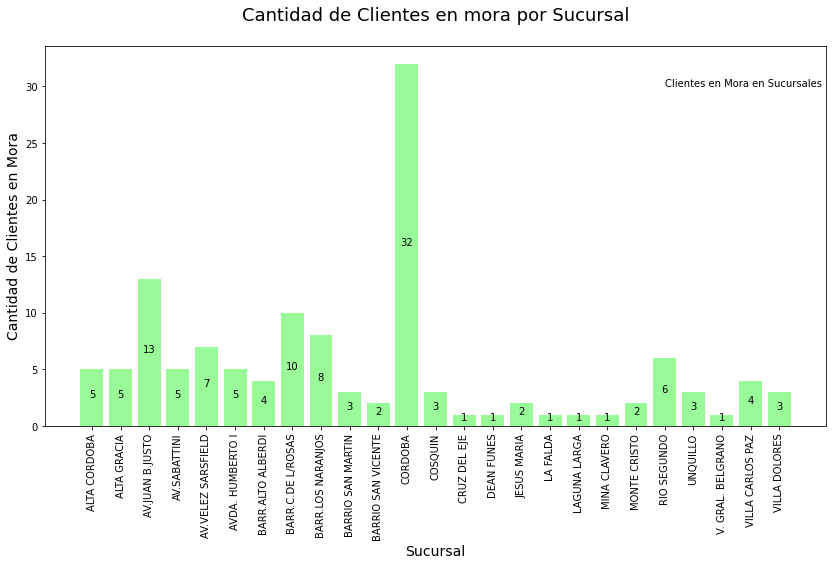

In [29]:
#Creo el gráfico y seteo el tamaño:
plt.figure(figsize=(14,7))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.bar(cant_suc.index,cant_suc, color='palegreen')


#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Cantidad de Clientes en Mora', size=14)
plt.xlabel('Sucursal', size=14)
plt.title('Cantidad de Clientes en mora por Sucursal', size=18, pad=25)

#Ajustes adicionales:
plt.grid(False)
plt.xticks(rotation=90)
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center")
        
add_value_label(cant_suc.index,cant_suc)       
plt.annotate("Clientes en Mora en Sucursales", (20, 30))


#Mostar el gráfico:
plt.show();

Creo un df con los promedios de los valores de la deuda en $ y otro con los dias de atraso.-

In [9]:
prom_suc=df.groupby(by='Nombre_Sucursal').Deuda_Pesificada.mean()
prom_suc

Nombre_Sucursal
ALTA CORDOBA          234013.542000
ALTA GRACIA           284120.848000
AV.JUAN B.JUSTO       197640.083077
AV.SABATTINI          234219.646000
AV.VELEZ SARSFIELD    241479.894286
AVDA. HUMBERTO I      252565.300000
BARR.ALTO ALBERDI     240577.527500
BARR.C.DE L/ROSAS     261168.299000
BARR.LOS NARANJOS     292279.313750
BARRIO SAN MARTIN     304115.033333
BARRIO SAN VICENTE    396857.150000
CORDOBA               309204.890313
COSQUIN               182755.666667
CRUZ DEL EJE          152000.000000
DEAN FUNES            277811.000000
JESUS MARIA           754381.290000
LA FALDA              165482.000000
LAGUNA LARGA          504075.500000
MINA CLAVERO          155100.000000
MONTE CRISTO          256003.090000
RIO SEGUNDO           230342.768333
UNQUILLO              163711.966667
V. GRAL. BELGRANO     154022.400000
VILLA CARLOS PAZ      294989.795000
VILLA DOLORES         422133.500000
Name: Deuda_Pesificada, dtype: float64

In [10]:
atraso_suc=df.groupby(by='Nombre_Sucursal').Atraso.mean()
atraso_suc

Nombre_Sucursal
ALTA CORDOBA          40.400000
ALTA GRACIA           49.600000
AV.JUAN B.JUSTO       67.461538
AV.SABATTINI          63.200000
AV.VELEZ SARSFIELD    62.142857
AVDA. HUMBERTO I      54.800000
BARR.ALTO ALBERDI     50.000000
BARR.C.DE L/ROSAS     65.400000
BARR.LOS NARANJOS     58.125000
BARRIO SAN MARTIN     75.333333
BARRIO SAN VICENTE    52.000000
CORDOBA               59.812500
COSQUIN               63.666667
CRUZ DEL EJE          80.000000
DEAN FUNES            80.000000
JESUS MARIA           58.500000
LA FALDA              52.000000
LAGUNA LARGA          87.000000
MINA CLAVERO          31.000000
MONTE CRISTO          58.500000
RIO SEGUNDO           55.500000
UNQUILLO              70.666667
V. GRAL. BELGRANO     80.000000
VILLA CARLOS PAZ      58.500000
VILLA DOLORES         77.666667
Name: Atraso, dtype: float64